<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Machine_Learning_Intro_California_housing/blob/main/Exploring_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn # scikit-learn library with many machine learning algorithms

- `longitude` va `latitude` - GPS coordinates of the house
- `housing_median_age` - median age of houses
- `total_rooms` - total number of the rooms in this region
- `total_bedrooms` - total number of the bedrooms in this region
- `population` - population of the region
- `households` - total number of the families in this region
- `median_income` - median income
- `median_house_values` - median price of the houses
- `ocean_proximity` - indicator of how the region is near to the ocean

In [2]:
# prepared dataset
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info() # get foundational information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts() # all columns are numeric except column named 'ocean_proximity', so let's see unique values here and their counts

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
df.describe() # getting statistical information about dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


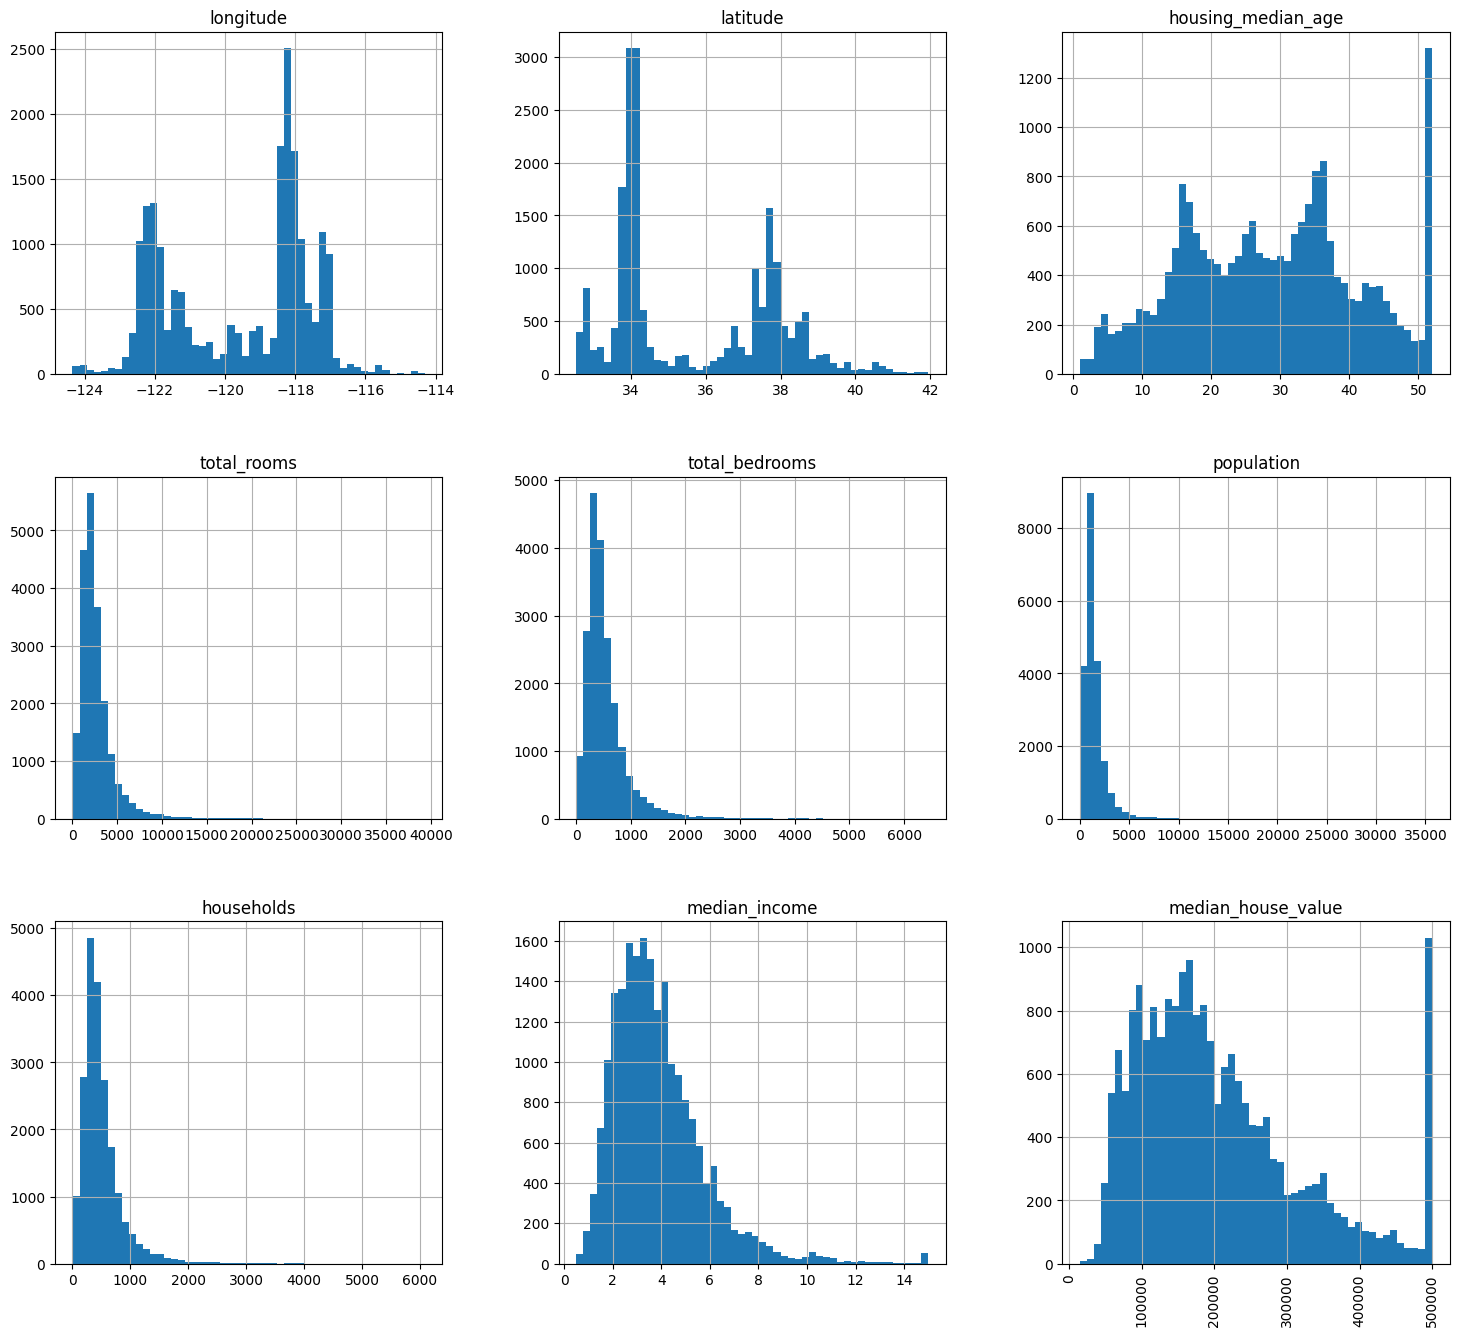

In [15]:
df.hist(bins = 50, figsize=(18, 16))
plt.xticks(rotation = 90) # getting information via visualization
plt.show()

In [11]:
from sklearn.model_selection import train_test_split # splitting dataset from getting train and test split, 1- method train_tes_split
train_set, test_set = train_test_split(df,test_size=0.2, random_state=42)

In [21]:
train_set.shape

(16512, 10)

In [19]:
test_set.shape

(4128, 10)

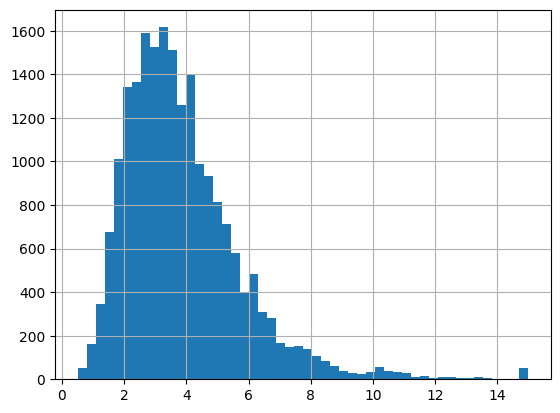

In [17]:
df['median_income'].hist(bins = 50)
plt.show()

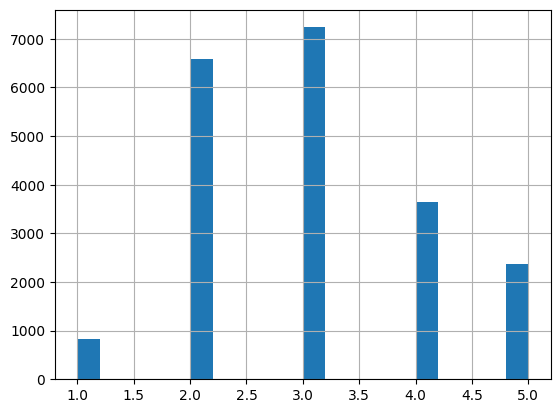

In [25]:
df['income_category'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])
df['income_category'].hist(bins = 20) # to make spiting more accurate we need to categorize our data
plt.show()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split_object = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Stratified Shuffele Split returns indexes so we need do it manually
for train_index, test_index in stratified_split_object.split(df, df['income_category']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [29]:
strat_train_set.drop('income_category', axis = 1, inplace = True)
strat_test_set.drop('income_category', axis = 1, inplace = True)

In [30]:
housing = strat_train_set.copy()

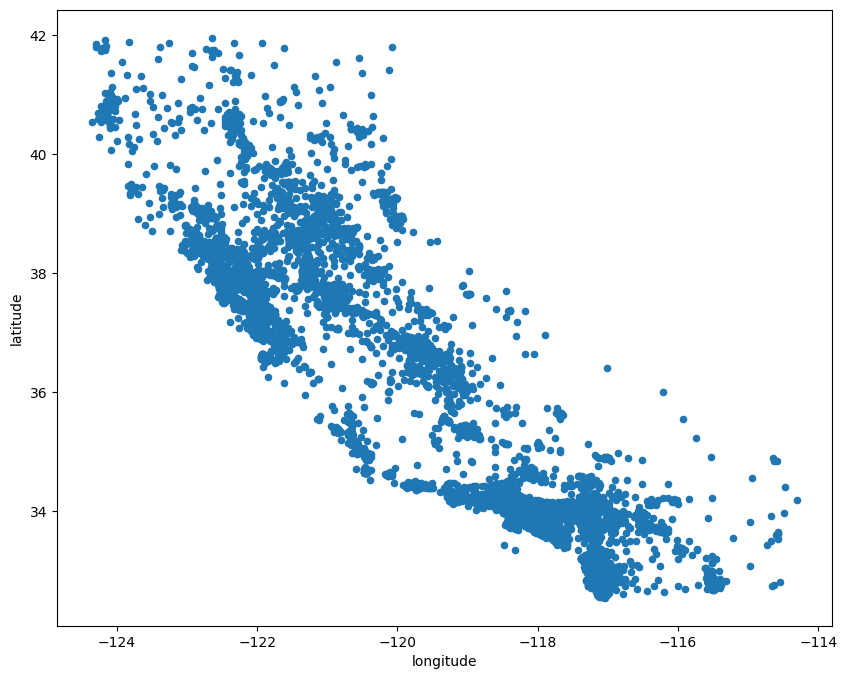

In [36]:
housing.plot(kind = 'scatter', x='longitude', y='latitude',figsize=(10, 8))
plt.show()

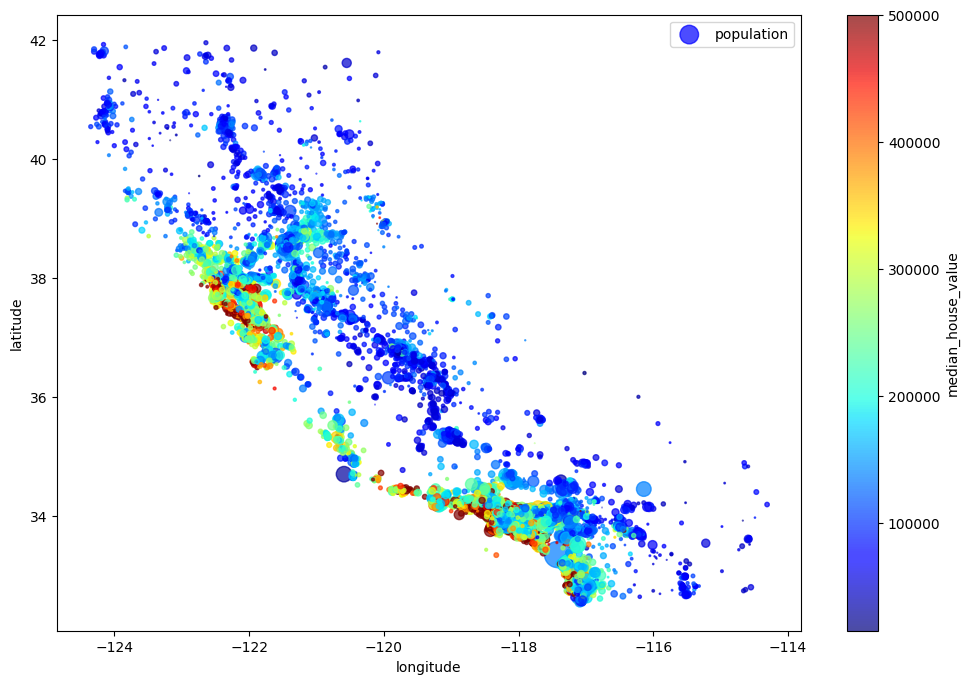

In [50]:
housing.plot(
    kind = 'scatter',
    x = 'longitude',
    y = 'latitude',
    s = housing['population'] / 100, # getting radius from the population based information
    cmap = 'jet', # color pack, blue = low, red = high
    label = 'population',
    c ='median_house_value', # geting for what to use colors
    colorbar = True,
    figsize=(12, 8),
    alpha = 0.7
)
plt.show()

In [59]:
df.corrwith(housing['median_house_value'],numeric_only=True).sort_values(ascending=False) # getting correlatin information

,0
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


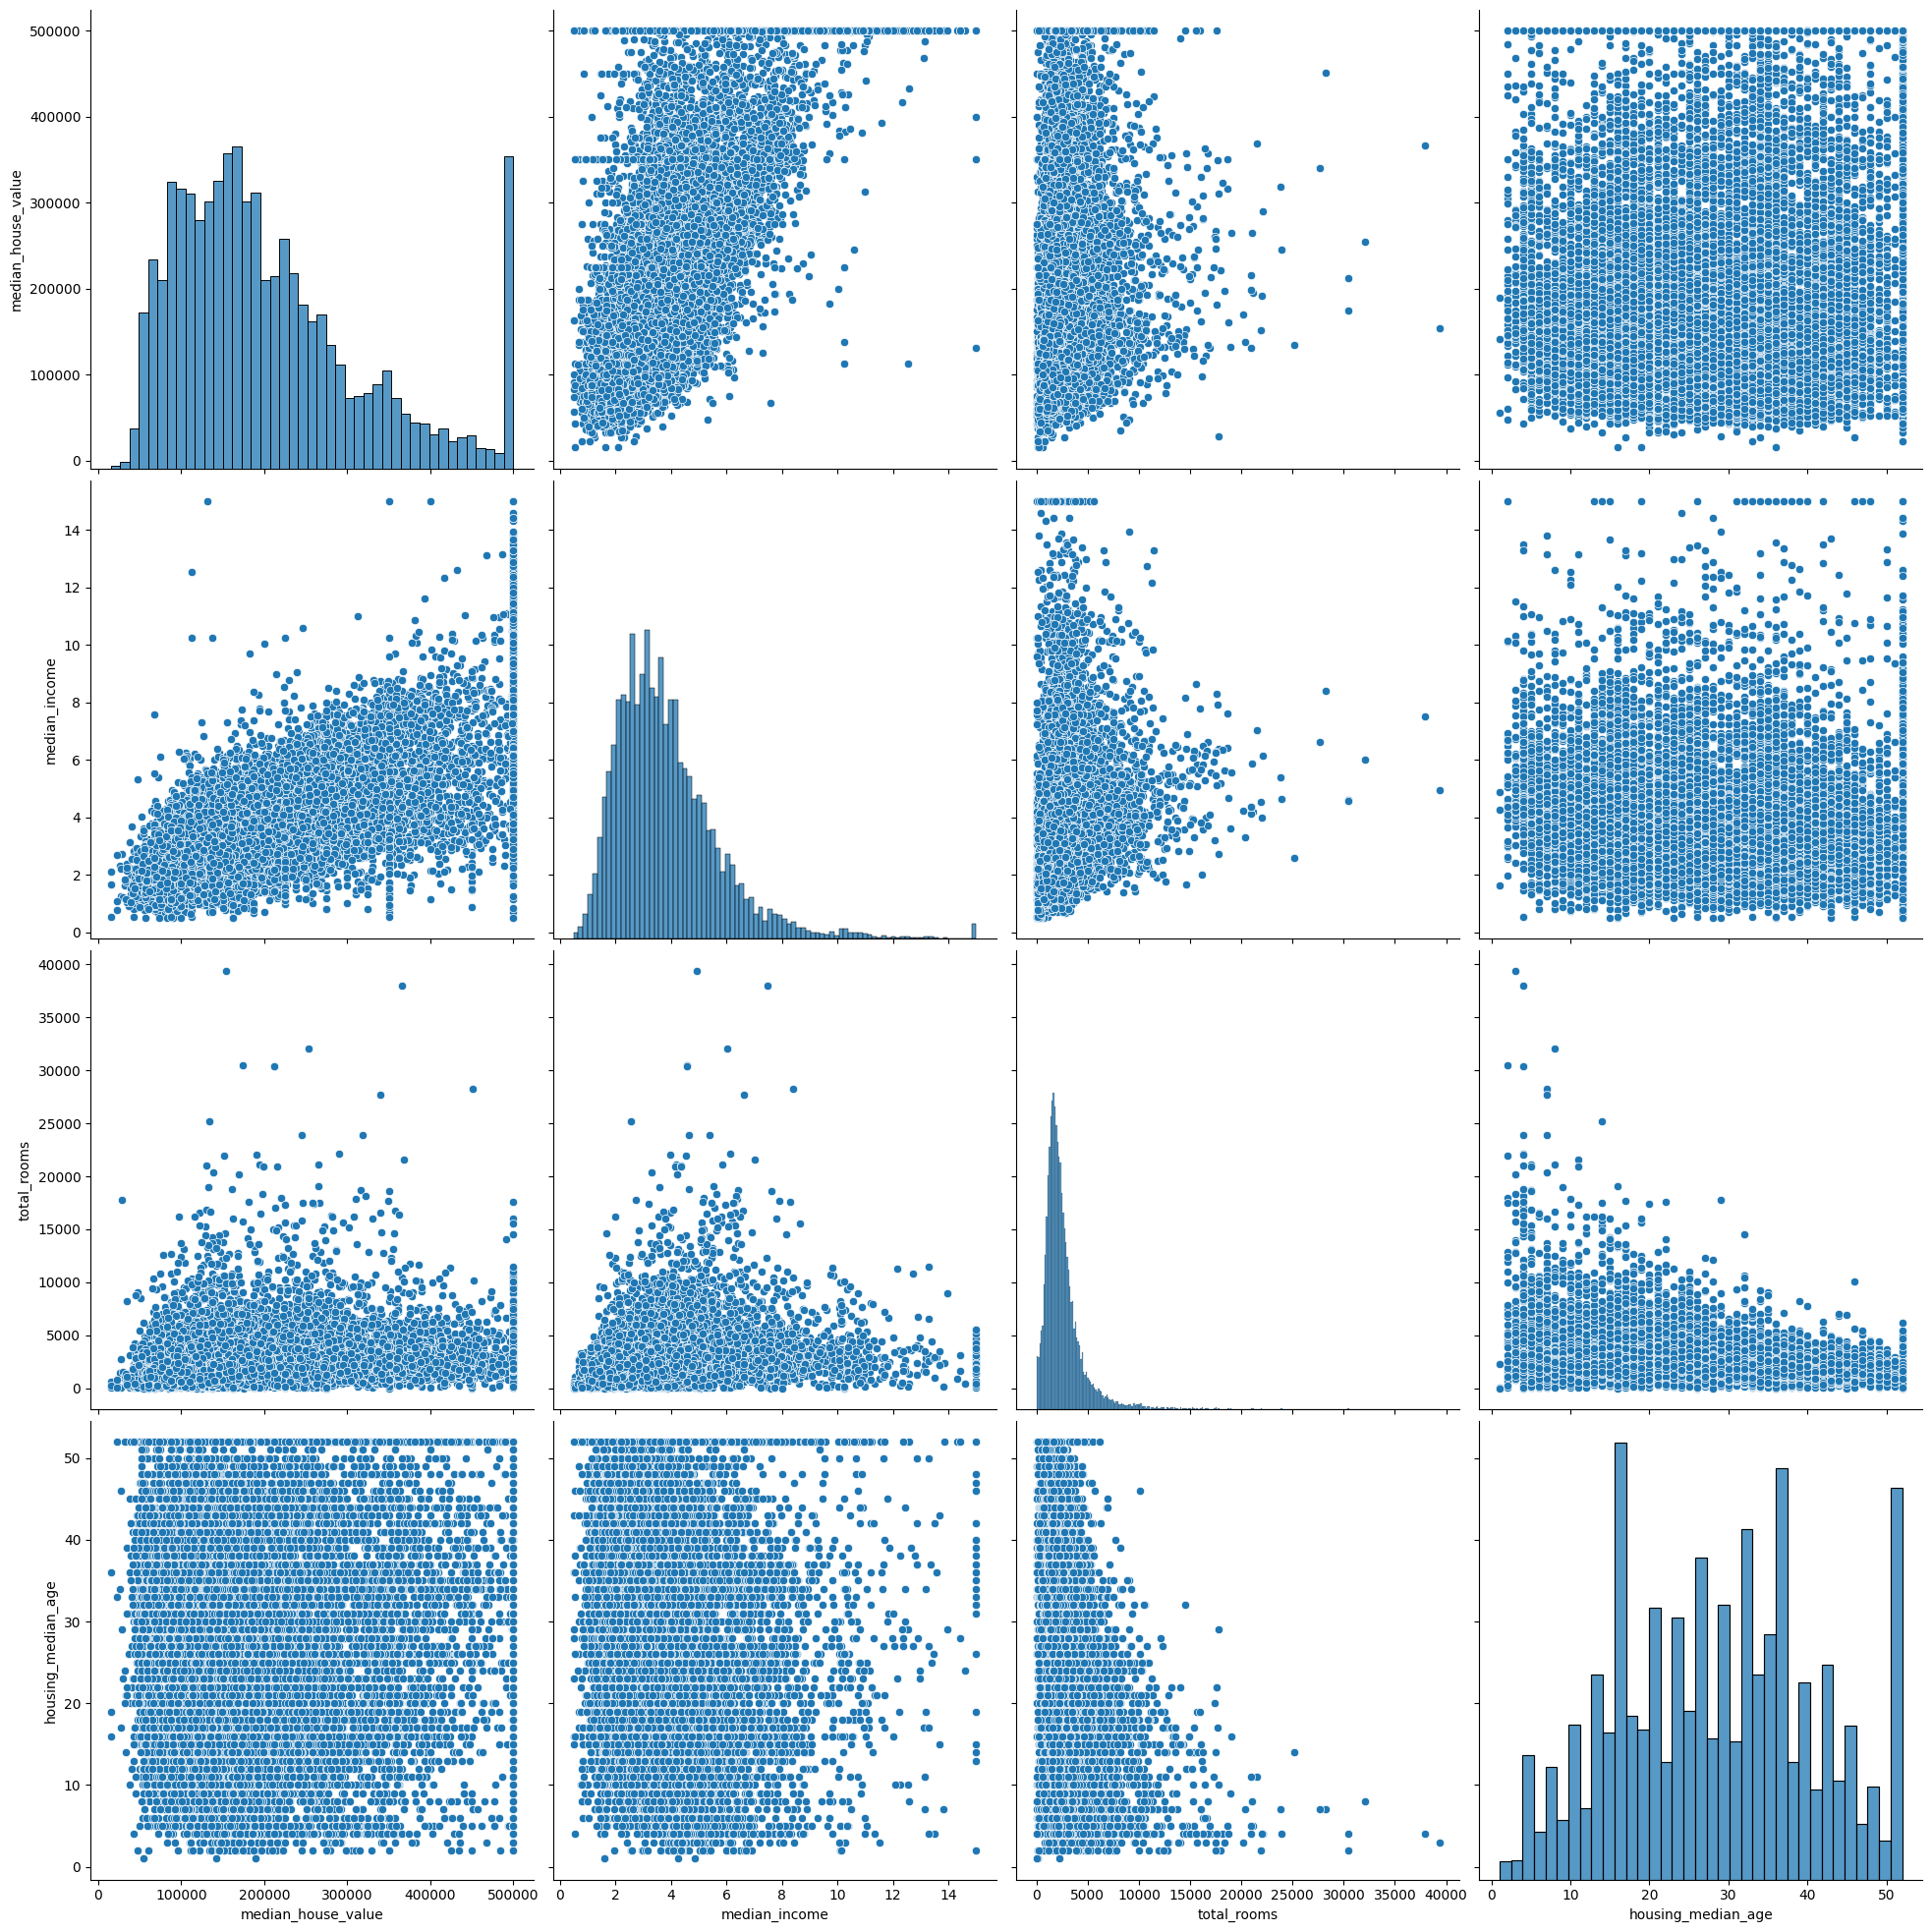

In [61]:
columns = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
sns.pairplot(housing[columns], height = 5)
plt.show()

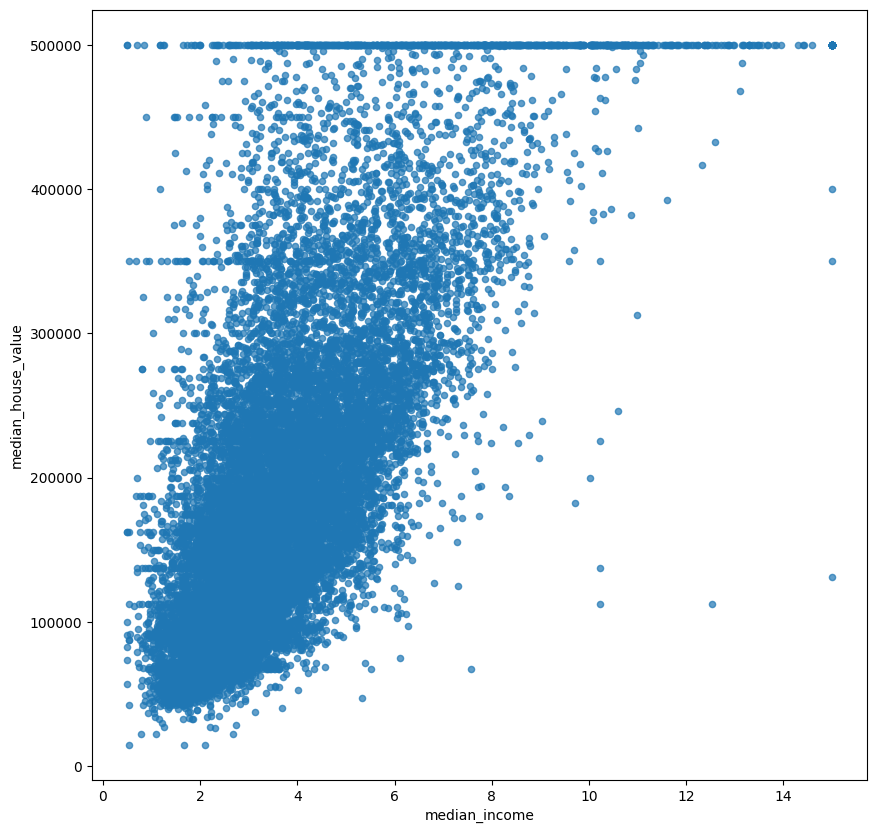

In [65]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', figsize = (10, 10), alpha = 0.7)
plt.show()